In [50]:
# step1
# 导入图片信息，创建imageLabelDict找到imageId和classId对应关系
import json
with open('train/info.json') as f:
    infos=json.loads(f.read())
imageLabelDictList=[]
imageLabelDict={}
for info in infos:
    d={}
    image_id=info['image_id']
    label_id=info['label_id']
    d[image_id]=label_id
    imageLabelDictList.append(d)
    imageLabelDict[image_id]=label_id
print('图片总数为：',len(imageLabelDict))

图片总数为： 53879


In [2]:
# import csv
# with open('train/trainClasses.csv') as f:
#     classes=csv.reader(f)
#     classListList=list(classes)
# classList=[]
# for item in classListList:
#     classList.append(item[1])
# print('类别总数为：',len(classList))

# step2
# 导入类别信息，创建classList
import pandas as pd
classes=pd.read_csv('train/trainClasses.csv',header=None)
classList=list(classes.iloc[:,1])

print(classList)

['航站楼', '停机坪', '机舱', '游乐场', '冰场', '舞台', '艺术室', '流水线', '棒球场', '橄榄球场', '足球场', '排球场', '高尔夫球场', '田径场', '滑雪场', '篮球馆(场)', '健身房', '保龄球馆', '游泳池', '拳击场', '跑马场', '田地/农场', '果园菜园', '牧场', '乡村', '温室', '电视台(演播室)', '亚洲寺庙', '亭子', '塔', '宫殿', '西式教堂', '街道', '餐厅食堂', '咖啡厅', '厨房', '广场', '实验室', '酒吧', '会议室', '办公室', '医院', '售票处', '露营地(帐篷）', '音乐工作室', '电梯/楼梯', '公园/花园', '建筑工地', '大型综合超市', '商店', '集市', '图书馆/书店', '教室', '海洋沙滩', '消防', '加油站', '垃圾场', '阳台', '游戏/棋牌室', '舞厅', '博物馆', '沙漠', '漂流', '树林', '桥', '住宅', '汽车展厅', '河流湖泊', '水族馆', '沟渠', '宴会厅', '卧室', '山', '站台', '草地', '育儿室', '美容/美发店', '修理店', '斗牛场', '雪屋/冰雕(山)']


In [3]:
# step3
# 导入图片，创建imageIdList和classIdList即y
import os
numOfImages=1000
imageIdList=os.listdir('train/train/')
imageIdList=imageIdList[:numOfImages]
classIdList=[]
for imageId in imageIdList:
    classId=imageLabelDict[imageId]
    classIdList.append(int(classId))
print('选用图片数量为：',len(imageIdList))

选用图片数量为： 1000


In [40]:
# step4
# 导入图片，创建imageArrayList,包含图片imageArray的list，每张图片的imageArray的shape都为100*100*3
import numpy as np
from PIL import Image
imageArrayList=[]
for imageId in imageIdList:
    imagePath='train/train/'+imageId
    image=Image.open(imagePath)
    image=image.resize((100,100))
    imageArray=np.array(image)
    imageArrayList.append(imageArray)

In [41]:
# step5
# 设置batch_size=4,即4张图一组，作为更新参数的最小单位，创建imageArrayArray
# imageArray有5维,假设选用5000张图片，则其维度为(1250,4,100,100,3)，1250代表所属batch，4代表该batch中第4张图，
# 100代表图片像素高，100代表图片像素宽，3代表第三个颜色通道的值(RGB三通道)
imageArrayListList=[]
for i in range(0,len(imageArrayList),4):
    imageArrayListList.append(imageArrayList[i:i+4])
imageArrayArray=np.array(imageArrayListList)
print('imageArrayArray维度为：',imageArrayArray.shape)
print('每组维度为：',imageArrayArray[0].shape)
print('每张图维度为：',imageArrayArray[0][0].shape)

imageArrayArray维度为： (250, 4, 100, 100, 3)
每组维度为： (4, 100, 100, 3)
每张图维度为： (100, 100, 3)


所选图片第一张如下
uint8


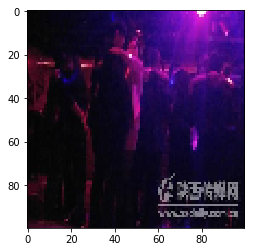

In [89]:
# step6
# 检查imageArrayArray是否创建成功
import matplotlib.pyplot as plt
print('所选图片第一张如下')
image1Array=imageArrayArray[0][0]
plt.imshow(image1Array)
plt.show()

In [43]:
# step 7
# 数据转换：将imageArrayArray转换成imageTensor
import torch
import numpy as np
from torchvision import transforms

transform=transforms.Compose([transforms.ToTensor(),])
imageList=imageArrayArray.tolist()
batchNumber=len(imageList)
imageNumber=len(imageList[0])
for batchIndex in range(batchNumber):
    for imageIndex in range(imageNumber):
        image=np.array(imageList[batchIndex][imageIndex])
        image=transform(image)
        print(image.shape)
        image=image.numpy()
        print(image.shape)
        image=image.tolist()
        imageList[batchIndex][imageIndex]=image
imageArray=np.array(imageList)
print(imageArray.shape)
imageTensor=torch.from_numpy(imageArray)
print(imageTensor.shape)

torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)


torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)


torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)


torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)


torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)
torch.Size([3, 100, 100])
(3, 100, 100)


In [44]:
# # step7
# # 数据转换：将imageArrayArray转换成Tensor
# import torch
# from torchvision import transforms
# import numpy as np
# transform=transforms.Compose([transforms.ToTensor(),])
# batchNumber=len(imageArrayListList)
# imageNumber=len(imageArrayListList[0])
# for batchIndex in range(batchNumber):
#     for imageIndex in range(imageNumber):
#         image=transform(imageArrayListList[batchIndex][imageIndex])
#         image=image.numpy()
#         image=image.tolist()
#         imageArrayListList[batchIndex][imageIndex]=image
# imageArray=np.array(imageArrayListList)
# imageTensor=torch.from_numpy(imageArrayArray)

In [45]:
# step8
# 构造神经网络
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
classNumber=len(classList)
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.pool=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(16*22*22,1000)
        self.fc2=nn.Linear(1000,200)
        self.fc3=nn.Linear(200,classNumber)
    
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*22*22)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=Net()

In [46]:
# # step9
# # 更新参数
# import torch.optim as optim
# import torchvision.transforms as transforms
# criterion=nn.CrossEntropyLoss()
# optimizer=optim.SGD(net.parameters(),lr=0.0001,momentum=0.9)
# transform=transforms.Compose([transforms.ToTensor(),])
# for epoch in range(2):
#     runningLoss=0.0
#     for i,inputs in enumerate(imageArray,0):
#         labels=classIdList[i:i+4]
#         labels=np.array(labels)
#         inputs=torch.from_numpy(inputs)
#         labels=torch.from_numpy(labels)
#         inputs=inputs.float()
#         inputs=Variable(inputs)
#         labels=Variable(labels)
        
#         optimizer.zero_grad()
#         outputs=net(inputs)
#         loss=criterion(outputs,labels)
#         loss.backward()
#         optimizer.step()
        
#         runningLoss+=loss.data[0]
#         if i%50==49:
#             print('[%d,%5d] loss: %.3f'%(epoch+1,i+1,runningLoss/50))
#             runningLoss=0.0
# print('Finished Training!')

In [47]:
# step9
# 训练模型，更新参数
import torch.optim as optim
import torchvision.transforms as transforms
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
transform=transforms.Compose([transforms.ToTensor(),])
for epoch in range(2):
    runningLoss=0.0
    for i,inputs in enumerate(imageTensor,0):
        labels=classIdList[i:i+4]
        labels=np.array(labels)
        labels=torch.from_numpy(labels)
        inputs=inputs.float()
        inputs=Variable(inputs)
        labels=Variable(labels)
        
        optimizer.zero_grad()
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        runningLoss+=loss.data[0]
        if i%50==49:
            print('[%d,%5d] loss: %.3f'%(epoch+1,i+1,runningLoss/50))
            runningLoss=0.0
print('Finished Training!')

[1,   50] loss: 4.385
[1,  100] loss: 4.383
[1,  150] loss: 4.381
[1,  200] loss: 4.378
[1,  250] loss: 4.378
[2,   50] loss: 4.383
[2,  100] loss: 4.381
[2,  150] loss: 4.379
[2,  200] loss: 4.375
[2,  250] loss: 4.376
Finished Training!


In [64]:
# 验证集

In [60]:
# step 1
# 导入、转换验证集

import json
with open('validation/info.json') as f:
    infos=json.loads(f.read())
imageLabelDictList=[]
imageLabelDict={}
for info in infos:
    d={}
    image_id=info['image_id']
    label_id=info['label_id']
    d[image_id]=label_id
    imageLabelDictList.append(d)
    imageLabelDict[image_id]=label_id
print('验证图片总数为：',len(imageLabelDict))

验证图片总数为： 7120


In [61]:
import os
numOfImages=1000
imageIdList=os.listdir('validation/validation/')
imageIdList=imageIdList[:numOfImages]
classIdList=[]
for imageId in imageIdList:
    classId=imageLabelDict[imageId]
    classIdList.append(int(classId))
print('选用验证图片数量为：',len(imageIdList))

选用验证图片数量为： 1000


In [91]:
import numpy as np
from PIL import Image
imageListList=[]
for imageId in imageIdList:
    imagePath='validation/validation/'+imageId
    image=Image.open(imagePath)
    image=image.resize((100,100))
    imageArray=np.array(image)
    imageList=imageArray.tolist()
    imageListList.append(imageList)
imageArray=np.array(imageListList)
imageArray=imageArray.astype('uint8')
print('imageArray维度为：',imageArray.shape)

imageArray维度为： (1000, 100, 100, 3)


所选图片第一张如下
uint8


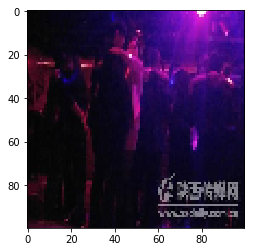

In [92]:
# step6
# 检查imageArray是否创建成功
import matplotlib.pyplot as plt
print('所选图片第一张如下')
image1Array=imageArray[0]
print(image1Array.dtype)
plt.imshow(image1Array)
plt.show()

In [99]:
# step 7
# 数据转换：将imageArray转换成imageTensor
import torch
from torchvision import transforms
transform=transforms.Compose([transforms.ToTensor(),])
imageNumber=len(imageArray)
imageList=[]
for imageIndex in range(imageNumber):
    image=imageArray[imageIndex]
    image=transform(image)
    image=image.numpy()
    image=image.tolist()
    imageList.append(image)
imageArray=np.array(imageList)
imageTensor=torch.from_numpy(imageArray)
print('imageTensor的维度为：',imageTensor.size())

imageTensor的维度为： torch.Size([1000, 3, 100, 100])


In [103]:
# step 8
# 在验证集上验证

correct=0
total=0.0
for i,image in enumerate(imageTensor):
    image=Variable(image)
    image=image.unsqueeze(0)
    image=image.float()
    output=net(image)
    _,predicted=torch.max(output.data,1)
    total+=1
    classId=classIdList[i]
    print(predicted,classId)
    correct+=(predicted==classId)
print(correct,total)
print('Accuracy on validation set is: %.3f'%(correct/total))


 11
[torch.LongTensor of size 1]
 59

 11
[torch.LongTensor of size 1]
 60

 11
[torch.LongTensor of size 1]
 34

 11
[torch.LongTensor of size 1]
 17

 11
[torch.LongTensor of size 1]
 3

 11
[torch.LongTensor of size 1]
 73

 11
[torch.LongTensor of size 1]
 15

 11
[torch.LongTensor of size 1]
 43

 11
[torch.LongTensor of size 1]
 3

 11
[torch.LongTensor of size 1]
 24

 11
[torch.LongTensor of size 1]
 30

 11
[torch.LongTensor of size 1]
 37

 11
[torch.LongTensor of size 1]
 0

 11
[torch.LongTensor of size 1]
 65

 11
[torch.LongTensor of size 1]
 48

 11
[torch.LongTensor of size 1]
 77

 11
[torch.LongTensor of size 1]
 45

 11
[torch.LongTensor of size 1]
 56

 11
[torch.LongTensor of size 1]
 35

 11
[torch.LongTensor of size 1]
 31

 11
[torch.LongTensor of size 1]
 11

 11
[torch.LongTensor of size 1]
 11

 11
[torch.LongTensor of size 1]
 52

 11
[torch.LongTensor of size 1]
 38

 11
[torch.LongTensor of size 1]
 40

 26
[torch.LongTensor of size 1]
 50

 11
[torch.Lon


 11
[torch.LongTensor of size 1]
 50

 11
[torch.LongTensor of size 1]
 4

 11
[torch.LongTensor of size 1]
 31

 11
[torch.LongTensor of size 1]
 73

 11
[torch.LongTensor of size 1]
 45

 11
[torch.LongTensor of size 1]
 4

 11
[torch.LongTensor of size 1]
 9

 11
[torch.LongTensor of size 1]
 9

 11
[torch.LongTensor of size 1]
 39

 11
[torch.LongTensor of size 1]
 25

 26
[torch.LongTensor of size 1]
 45

 11
[torch.LongTensor of size 1]
 2

 11
[torch.LongTensor of size 1]
 52

 11
[torch.LongTensor of size 1]
 67

 26
[torch.LongTensor of size 1]
 63

 11
[torch.LongTensor of size 1]
 31

 11
[torch.LongTensor of size 1]
 37

 11
[torch.LongTensor of size 1]
 5

 11
[torch.LongTensor of size 1]
 62

 11
[torch.LongTensor of size 1]
 9

 11
[torch.LongTensor of size 1]
 60

 11
[torch.LongTensor of size 1]
 28

 11
[torch.LongTensor of size 1]
 32

 11
[torch.LongTensor of size 1]
 8

 11
[torch.LongTensor of size 1]
 31

 11
[torch.LongTensor of size 1]
 7

 11
[torch.LongTenso

 76

 11
[torch.LongTensor of size 1]
 26

 11
[torch.LongTensor of size 1]
 17

 26
[torch.LongTensor of size 1]
 70

 11
[torch.LongTensor of size 1]
 31

 11
[torch.LongTensor of size 1]
 65

 11
[torch.LongTensor of size 1]
 59

 11
[torch.LongTensor of size 1]
 25

 11
[torch.LongTensor of size 1]
 21

 11
[torch.LongTensor of size 1]
 11

 11
[torch.LongTensor of size 1]
 58

 11
[torch.LongTensor of size 1]
 26

 11
[torch.LongTensor of size 1]
 54

 11
[torch.LongTensor of size 1]
 58

 11
[torch.LongTensor of size 1]
 31

 11
[torch.LongTensor of size 1]
 10

 11
[torch.LongTensor of size 1]
 69

 26
[torch.LongTensor of size 1]
 21

 11
[torch.LongTensor of size 1]
 70

 11
[torch.LongTensor of size 1]
 72

 11
[torch.LongTensor of size 1]
 21

 11
[torch.LongTensor of size 1]
 52

 11
[torch.LongTensor of size 1]
 64

 11
[torch.LongTensor of size 1]
 30

 26
[torch.LongTensor of size 1]
 5

 11
[torch.LongTensor of size 1]
 24

 11
[torch.LongTensor of size 1]
 4

 11
[torc

 8

 11
[torch.LongTensor of size 1]
 9

 11
[torch.LongTensor of size 1]
 72

 11
[torch.LongTensor of size 1]
 12

 11
[torch.LongTensor of size 1]
 6

 11
[torch.LongTensor of size 1]
 71

 11
[torch.LongTensor of size 1]
 61

 11
[torch.LongTensor of size 1]
 46

 11
[torch.LongTensor of size 1]
 37

 11
[torch.LongTensor of size 1]
 29

 11
[torch.LongTensor of size 1]
 3

 11
[torch.LongTensor of size 1]
 41

 11
[torch.LongTensor of size 1]
 73

 11
[torch.LongTensor of size 1]
 6

 11
[torch.LongTensor of size 1]
 71

 11
[torch.LongTensor of size 1]
 43

 11
[torch.LongTensor of size 1]
 18

 11
[torch.LongTensor of size 1]
 79

 11
[torch.LongTensor of size 1]
 39

 11
[torch.LongTensor of size 1]
 58

 26
[torch.LongTensor of size 1]
 78

 11
[torch.LongTensor of size 1]
 4

 11
[torch.LongTensor of size 1]
 55

 11
[torch.LongTensor of size 1]
 39

 11
[torch.LongTensor of size 1]
 9

 11
[torch.LongTensor of size 1]
 14

 11
[torch.LongTensor of size 1]
 64

 11
[torch.Lon


 11
[torch.LongTensor of size 1]
 51

 11
[torch.LongTensor of size 1]
 28

 11
[torch.LongTensor of size 1]
 32

 11
[torch.LongTensor of size 1]
 65

 11
[torch.LongTensor of size 1]
 62

 11
[torch.LongTensor of size 1]
 6

 11
[torch.LongTensor of size 1]
 4

 11
[torch.LongTensor of size 1]
 27

 11
[torch.LongTensor of size 1]
 64

 11
[torch.LongTensor of size 1]
 45

 11
[torch.LongTensor of size 1]
 65

 11
[torch.LongTensor of size 1]
 72

 11
[torch.LongTensor of size 1]
 46

 11
[torch.LongTensor of size 1]
 68

 11
[torch.LongTensor of size 1]
 69

 11
[torch.LongTensor of size 1]
 9

 11
[torch.LongTensor of size 1]
 32

 11
[torch.LongTensor of size 1]
 42

 11
[torch.LongTensor of size 1]
 49

 11
[torch.LongTensor of size 1]
 53

 11
[torch.LongTensor of size 1]
 1

 11
[torch.LongTensor of size 1]
 29

 11
[torch.LongTensor of size 1]
 16

 11
[torch.LongTensor of size 1]
 5

 11
[torch.LongTensor of size 1]
 12

 11
[torch.LongTensor of size 1]
 37

 11
[torch.LongT

TypeError: div received an invalid combination of arguments - got (float), but expected one of:
 * (int value)
      didn't match because some of the arguments have invalid types: ([31;1mfloat[0m)
 * (torch.ByteTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mfloat[0m)
